In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import dropbox as db

In [155]:
## Global defintions and settings
color_palette_reds = ['#E74C3C', '#C0392B', '#FAFAFA']

sns.set_style('white')
sns.set_palette(sns.color_palette(color_palette_reds))

# SFV EM 2020 File Import

In [156]:
!ln -s /Users/matthiashugli/Virtualenvs/youth-base/youth-base/config.py config.py
from config import dbx_token
dbx = db.Dropbox(dbx_token)

filename = '/Users/matthiashugli/Dropbox/bucket/euro2020/raw-analyse-sfv.csv'

df = pd.DataFrame()
file = pd.read_csv(filename, header=3, delimiter=',', low_memory=False)
df = df.append(file)

ln: config.py: File exists


In [157]:
df.drop(df.columns[0], axis=1, inplace=True)
df.loc[len(df.index)] = df.iloc[1]

In [158]:

# Create and Clean Header
## Need to promote header afterwards
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_')

# 6 standards, 7 standards_no, 12 indirekter_freistoss, 20 nahdistanzzone, 27 should_catch, should_go, should_back, should_stay, 50 technik_falsch
typos = {'standarts': 'standards', 'unnamed:_8': 'standards_no', 'ndirekter_freistoss': 'indirekter_freistoss', 'nahdistanzzpone': 'nahdistanzzone', 
'wenn_falsch_cgbs': 'should_catch', 'unnamed:_29': 'should_go', 'unnamed:_30': 'should_back', 'unnamed:_31': 'should_stay', 'unnamed:_51': 'technik_falsch', '': '',}

df.rename(columns=typos, inplace=True)
df.drop([0], inplace=True)

In [159]:
# Cleanse goalkeeper names
df['goalkeeper'] = df['th_name'].str.split(' ')
df['goalkeeper'] = [df['goalkeeper'].iloc[x][-1] for x in range(len(df))]

df['goalkeeper'] = df.goalkeeper.apply(lambda x: 'Szczesny' if x == 'Szeczesny' else x)
df['goalkeeper'] = df.goalkeeper.apply(lambda x: 'Dubravka' if x == 'Dúbravka' else x)
df['goalkeeper'] = df.goalkeeper.apply(lambda x: 'Simon' if x == 'Simón' else x)
df['goalkeeper'] = df.goalkeeper.apply(lambda x: 'Olsen' if x == 'Everton' else x)

In [160]:
col_event_infos = df.columns[0:6].tolist()
col_standards = df.columns[6:14].tolist()
col_spielsituation = df.columns[14:21].tolist()
col_verhalten = df.columns[21:31].tolist()
col_technik = df.columns[31:51].tolist()
col_tore = df.columns[51:57].tolist()

print(col_spielsituation)


['ball_durch_den_16er', 'hoher_ball', 'pass_in_die_tiefe', 'rückpass_vor_der_grundlinie', 'rote_zone', 'distanzschuss', 'nahdistanzzone']


In [161]:
### Cleansing and Aggregating Standardsituationen
df.standards_no[df[df.columns[6]].isna() & df[df.columns[7]].isna() & df[df.columns[8]].isna() & df[df.columns[9]].isna() & df[df.columns[10]].isna() & df[df.columns[11]].isna() & df[df.columns[12]].isna() & df[df.columns[13]].isna()] = '1'

df.loc[df.standards == '1', 'ist_standard'] = 'ja'
df.loc[df.standards_no == '1', 'ist_standard'] = 'nein'

i = 8
for x in df:
    if i < 14:
        df.loc[df.iloc[:, i] == '1', 'standard_type'] = df.columns[i]
    i += 1

### Cleansing and Aggregating Spielsituationen
i = 14
for x in df:
    if i < 21:
        df.loc[df.iloc[:, i] == '1', 'spielsituation'] = df.columns[i]
    i += 1

### Cleansing and Aggregating Verhalten
df.loc[df.richtig == '1', 'korrektes_verhalten'] = 'ja'
df.loc[df.falsch == '1', 'korrektes_verhalten'] = 'nein'

i = 21
for x in df:
    if i < 25:
        df.loc[df.iloc[:, i] == '1', 'verhalten'] = df.columns[i]
    i += 1


i = 27
for x in df:
    if i < 31:
        df.loc[df.iloc[:, i] == '1', 'ideales_verhalten'] = df.columns[i]
    i += 1

### Cleansing and Aggregating Technik
df.loc[df.technik_korrekt == '1', 'korrekte_technik'] = 'ja'
df.loc[df.technik_falsch == '1', 'korrekte_technik'] = 'nein'

i = 30
for x in df:
    if i < 48:
        df.loc[df.iloc[:, i] == '1', 'technik'] = df.columns[i]
    i += 1

### Cleansing and Aggregating Outcome
i = 51
for x in df:
    if i < 57:
        df.loc[df.iloc[:, i] == '1', 'outcome'] = df.columns[i]
    i += 1




print(df.head(10))

   spielcode            th_name    team  paarung minuten topszene standards  \
1         VR  TUR Ugurcan Cakir  Türkei  Italien    2'09      NaN       NaN   
2         VR  TUR Ugurcan Cakir  Türkei  Italien    3'50      NaN       NaN   
3         VR  TUR Ugurcan Cakir  Türkei  Italien    6'49      NaN       NaN   
4         VR  TUR Ugurcan Cakir  Türkei  Italien   13'26      NaN       NaN   
5         VR  TUR Ugurcan Cakir  Türkei  Italien   14'02      NaN       NaN   
6         VR  TUR Ugurcan Cakir  Türkei  Italien   18'43      NaN       NaN   
7         VR  TUR Ugurcan Cakir  Türkei  Italien   19'08      NaN       NaN   
8         VR  TUR Ugurcan Cakir  Türkei  Italien   20'12      NaN       NaN   
9         VR  TUR Ugurcan Cakir  Türkei  Italien   21'38        T         1   
10        VR  TUR Ugurcan Cakir  Türkei  Italien   22'02      NaN         1   

   standards_no seitlicher_freistoss eckball  ... goalkeeper ist_standard  \
1             1                  NaN     NaN  ...    

In [162]:
df = df.drop(columns=col_standards)
standard_column = df.pop('ist_standard')
df.insert(6, 'ist_standard', standard_column)

df = df.drop(columns=col_spielsituation)

df = df.drop(columns=col_verhalten)
verhalten_column = df.pop('korrektes_verhalten')
df.insert(7, 'korrektes_verhalten', verhalten_column)

df = df.drop(columns=col_technik)
technik_column = df.pop('korrekte_technik')
df.insert(8, 'korrekte_technik', technik_column)

df = df.drop(columns=col_tore)

In [163]:
print(df.head())

  spielcode            th_name    team  paarung minuten topszene ist_standard  \
1        VR  TUR Ugurcan Cakir  Türkei  Italien    2'09      NaN         nein   
2        VR  TUR Ugurcan Cakir  Türkei  Italien    3'50      NaN         nein   
3        VR  TUR Ugurcan Cakir  Türkei  Italien    6'49      NaN         nein   
4        VR  TUR Ugurcan Cakir  Türkei  Italien   13'26      NaN         nein   
5        VR  TUR Ugurcan Cakir  Türkei  Italien   14'02      NaN         nein   

  korrektes_verhalten korrekte_technik goalkeeper standard_type  \
1                  ja               ja      Cakir           NaN   
2                  ja               ja      Cakir           NaN   
3                  ja               ja      Cakir           NaN   
4                  ja               ja      Cakir           NaN   
5                  ja              NaN      Cakir           NaN   

                spielsituation verhalten ideales_verhalten     technik  \
1  rückpass_vor_der_grundlinie      

# Analyse Spielsituationen

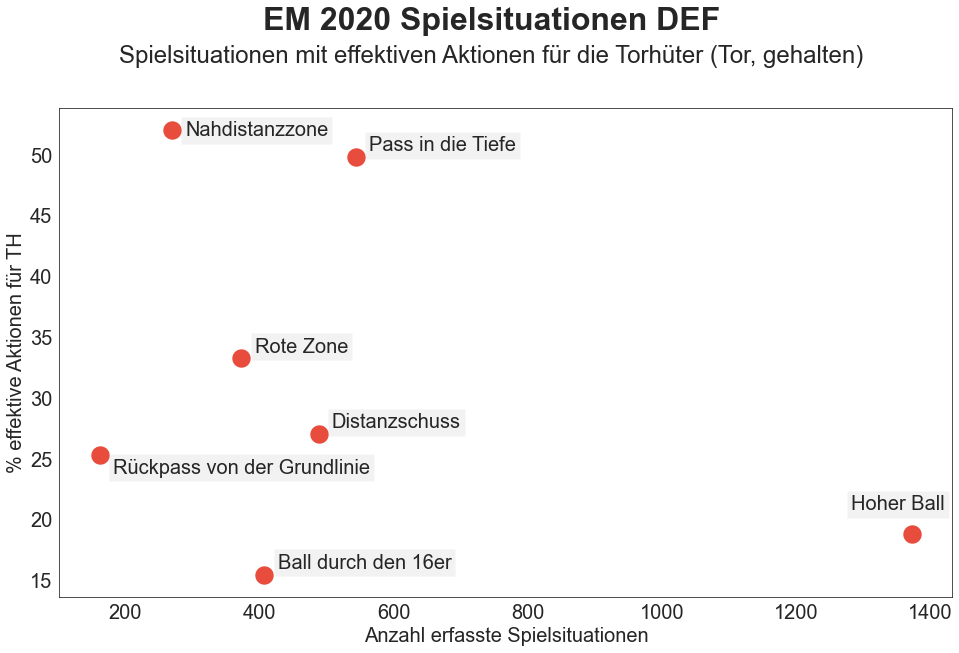

In [164]:
## Create Table with Spielsituationen and GK events 
df['ausführung'] = df.outcome.apply(lambda x: 'ja' if x in ['tor_erhalten', 'kein_tor_gehalten'] else 'nein')
aktionen_spielsituation = df.groupby(['spielsituation', 'ausführung']).spielcode.count().reset_index()
aktionen_spielsituation = aktionen_spielsituation.pivot(index='spielsituation', columns='ausführung', values='spielcode').reset_index()
aktionen_spielsituation['total'] = aktionen_spielsituation.ja + aktionen_spielsituation.nein
aktionen_spielsituation['ausführungen_%'] = aktionen_spielsituation.ja / aktionen_spielsituation.total * 100
aktionen_spielsituation.drop(columns=['ja', 'nein'], inplace=True)

## Create Figure Spielsituationen
fig = plt.figure(figsize=(16,9))

text_spielsituationen = ['Ball durch den 16er', 'Distanzschuss', 'Hoher Ball', 'Nahdistanzzone', 'Pass in die Tiefe', 'Rote Zone', 'Rückpass von der Grundlinie']
label_xpos = [20, 20, -90, 20, 20, 20, 20]
label_ypos = [0.5, 0.5, 2, -0.5, 0.5, 0.5, -1.5]
for i in range(aktionen_spielsituation.shape[0]):
    plt.text(x=aktionen_spielsituation.total[i]+label_xpos[i], 
        y=aktionen_spielsituation['ausführungen_%'][i]+label_ypos[i], 
        s=text_spielsituationen[i], 
        fontsize=20,
        bbox=dict(facecolor='gray', alpha=0.1))

graph = sns.scatterplot(x='total', y='ausführungen_%', s=400, data=aktionen_spielsituation)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Anzahl erfasste Spielsituationen', fontsize=20)
plt.ylabel('% effektive Aktionen für TH', fontsize=20)
#plt.title('Aktionen für TH und Häufigkeit der Spielsituationen', fontsize=24, pad=20)
fig.text(0.5, 1, 'EM 2020 Spielsituationen DEF', ha='center', fontsize=32, fontweight='bold')
fig.text(0.5, 0.95, 'Spielsituationen mit effektiven Aktionen für die Torhüter (Tor, gehalten)', ha='center', fontsize=24)

plt.savefig('em2020_torhüter_aktionen.png')
plt.show()

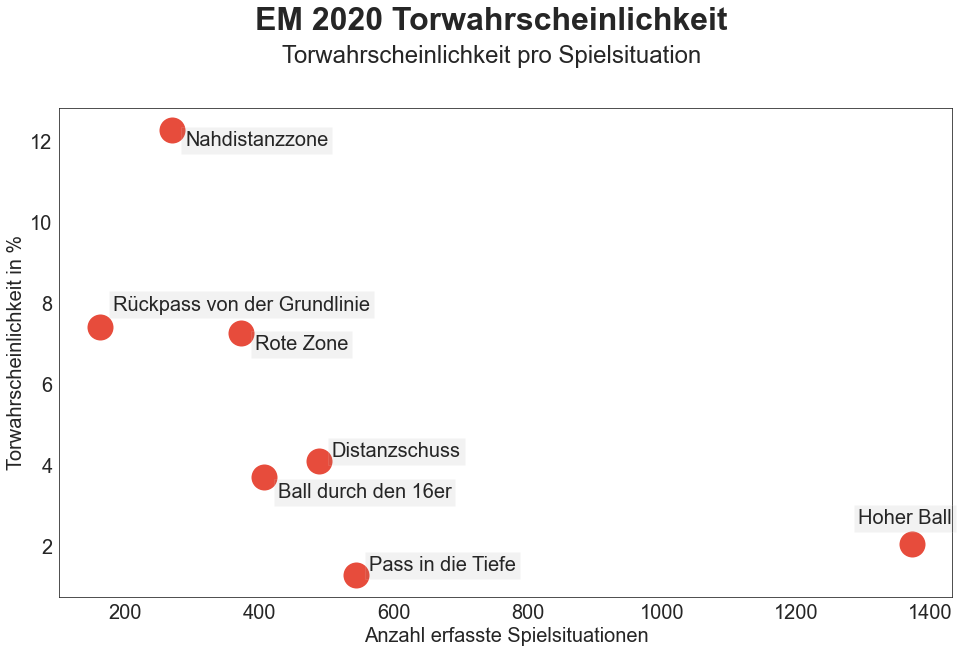

In [165]:
## Create Table with Spielsituationen and GK events
df['ist_tor'] = df.outcome.apply(lambda x: 'ja' if x == 'tor_erhalten' else 'nein')
torgefahr = df.groupby(['spielsituation', 'ist_tor']).spielcode.count().reset_index()
torgefahr = torgefahr.pivot(index='spielsituation', columns='ist_tor', values='spielcode').reset_index()
torgefahr['total'] = torgefahr.ja + torgefahr.nein
torgefahr['tor_%'] = torgefahr.ja / torgefahr.total * 100
torgefahr.drop(columns=['ja', 'nein'], inplace=True)

## Create Figure with Goal Expectations per Spielsituation
fig = plt.figure(figsize=(16,9))

sns.scatterplot(x='total', y='tor_%', s=800, data=torgefahr)

text_spielsituationen = ['Ball durch den 16er', 'Distanzschuss', 'Hoher Ball', 'Nahdistanzzone', 'Pass in die Tiefe', 'Rote Zone', 'Rückpass von der Grundlinie']
label_xpos = [20, 20, -80, 20, 20, 20, 20]
label_ypos = [-0.5, 0.1, 0.5, -0.4, 0.1, -0.4, 0.4]
for i in range(torgefahr.shape[0]):
    plt.text(x=torgefahr.total[i]+label_xpos[i], 
        y=torgefahr['tor_%'][i]+label_ypos[i], 
        s=text_spielsituationen[i], 
        fontsize=20,
        bbox=dict(facecolor='gray', alpha=0.1))

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Anzahl erfasste Spielsituationen', fontsize=20)
plt.ylabel('Torwahrscheinlichkeit in %', fontsize=20)
fig.text(0.5, 1, 'EM 2020 Torwahrscheinlichkeit', ha='center', fontsize=32, fontweight='bold')
fig.text(0.5, 0.95, 'Torwahrscheinlichkeit pro Spielsituation', ha='center', fontsize=24)

    
plt.show()

# Analyze Nahdistanzzone

<Figure size 1152x648 with 0 Axes>

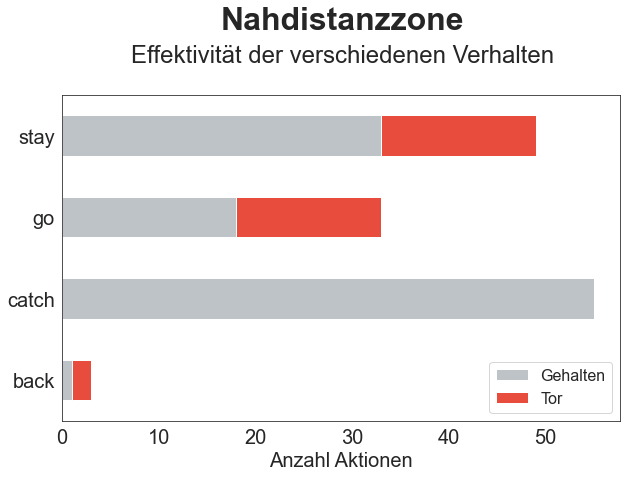

In [15]:
nahdistanz = df[(df.spielsituation == 'nahdistanzzone') & ((df.outcome == 'kein_tor_gehalten') | (df.outcome == 'tor_erhalten'))]
group_ndz = nahdistanz.groupby(['verhalten', 'outcome']).spielcode.count().unstack(fill_value=0).stack().reset_index()
group_ndz.rename(columns={0: 'aktionen'}, inplace=True)
pivot_ndz = group_ndz.pivot(index='verhalten', columns='outcome', values='aktionen').reset_index()
#pivot_ndz_sum = pivot_ndz.sum()
#pivot_ndz.drop(columns=['kein_tor_geblockt','keine_aktion', 'verteidiger_klärt', 'kein_tor_daneben'], inplace=True)
cols = pivot_ndz.columns[1:4].tolist()
#pivot_ndz[cols] = pivot_ndz[cols].div(pivot_ndz[cols].sum(axis=1), axis=0)

fig = plt.figure(figsize=(16,9))

pivot_ndz.plot.barh(stacked=True, figsize=(10,6), color=['#BDC3C7','#E74C3C'])

ay = plt.subplot()
legend = ['Gehalten', 'Tor']
ay.legend(legend, loc=4, fontsize=16)
ay.set_yticks(range(len(pivot_ndz)))
ay.set_yticklabels(pivot_ndz['verhalten'])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Anzahl Aktionen', fontsize=20)
plt.text(29, 4.3, 'Nahdistanzzone', ha='center', fontsize=32, fontweight='bold')
plt.text(29, 3.9, 'Effektivität der verschiedenen Verhalten', ha='center', fontsize=24)


plt.show()

# Analyse Rote Zone
Die Rote Zone zeichnet sich durch eine nahe Distanz zum Tor aus, jedoch erhält der Torhüter die Möglichlkeit auf den Ball zu reagieren. Am häufigsten haben die Torhüter ein Stay, also ein Verschieben in die Winkel angewendet und waren damit bei effektiven Abschlüssen auch erfolgreich. Der Entscheid **Go** war nur zu knapp 50% erfolgreich und scheint kein Erfolgsrezept zu sein.

<Figure size 1152x648 with 0 Axes>

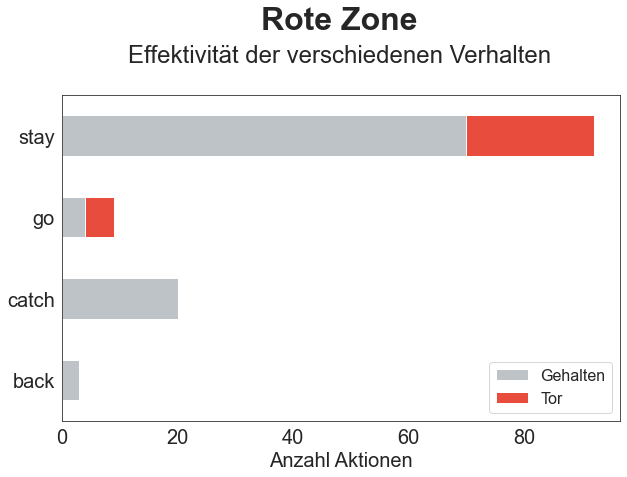

In [16]:
rote_zone = df[df.spielsituation == 'rote_zone']
group_rz = rote_zone.groupby(['verhalten', 'outcome']).spielcode.count().reset_index()
pivot_rz = group_rz.pivot(index='verhalten', columns='outcome', values='spielcode').reset_index()
#pivot_ndz_sum = pivot_ndz.sum()
pivot_rz.drop(columns=['kein_tor_geblockt','keine_aktion', 'verteidiger_klärt', 'kein_tor_daneben'], inplace=True)
cols = pivot_rz.columns[1:3].tolist()
#pivot_rz[cols] = pivot_rz[cols].div(pivot_rz[cols].sum(axis=1), axis=0)

fig = plt.figure(figsize=(16,9))

pivot_rz.plot.barh(stacked=True, figsize=(10,6), color=['#BDC3C7','#E74C3C'])
ay = plt.subplot()
legend = ['Gehalten', 'Tor']
ay.legend(legend, loc=4, fontsize=16)
ay.set_yticks(range(len(pivot_ndz)))
ay.set_yticklabels(pivot_rz['verhalten'])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Anzahl Aktionen', fontsize=20)
plt.text(48, 4.3, 'Rote Zone', ha='center', fontsize=32, fontweight='bold')
plt.text(48, 3.9, 'Effektivität der verschiedenen Verhalten', ha='center', fontsize=24)

plt.show()

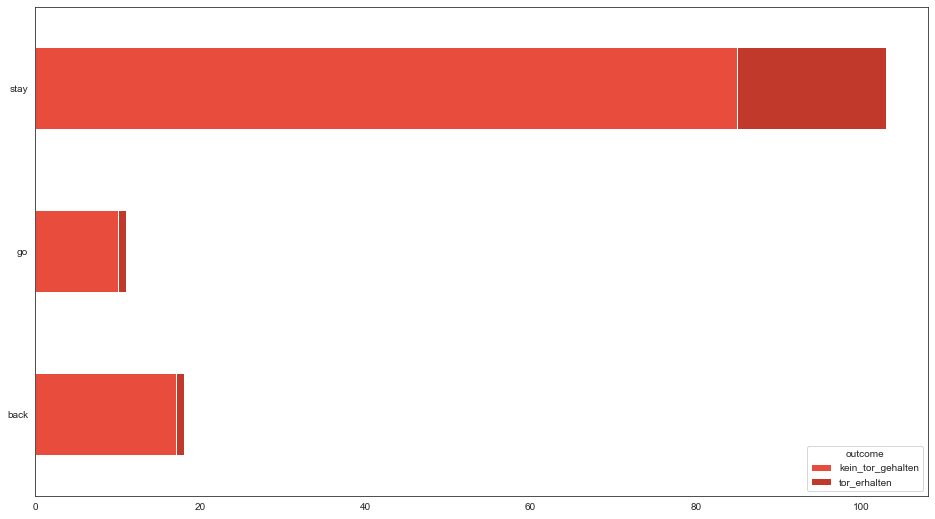

In [17]:
distanzschuss = df[df.spielsituation == 'distanzschuss']
group_distanz = distanzschuss.groupby(['verhalten', 'outcome']).spielcode.count().reset_index()
pivot_distanz = group_distanz.pivot(index='verhalten', columns='outcome', values='spielcode').reset_index()
#pivot_ndz_sum = pivot_ndz.sum()
pivot_distanz.drop(columns=['kein_tor_geblockt','keine_aktion', 'verteidiger_klärt', 'kein_tor_daneben'], inplace=True)
cols = pivot_distanz.columns[1:3].tolist()
#pivot_distanz[cols] = pivot_distanz[cols].div(pivot_distanz[cols].sum(axis=1), axis=0)

pivot_distanz.plot.barh(stacked=True, figsize=(16,9))
ay = plt.subplot()
ay.set_yticks(range(len(pivot_distanz)))
ay.set_yticklabels(pivot_distanz['verhalten'])



plt.show()

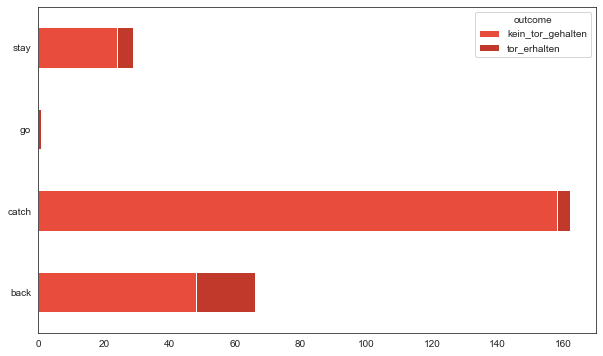

In [18]:
hoher_ball = df[df.spielsituation == 'hoher_ball']
group_hb = hoher_ball.groupby(['verhalten', 'outcome']).spielcode.count().reset_index()
pivot_hb = group_hb.pivot(index='verhalten', columns='outcome', values='spielcode').reset_index()
pivot_hb.drop(columns=['kein_tor_geblockt','keine_aktion', 'verteidiger_klärt', 'kein_tor_daneben'], inplace=True)
cols = pivot_hb.columns[1:3].tolist()
#pivot_hb[cols] = pivot_hb[cols].div(pivot_hb[cols].sum(axis=1), axis=0)

pivot_hb.plot.barh(stacked=True, figsize=(10,6))
ay = plt.subplot()
ay.set_yticks(range(len(pivot_hb)))
ay.set_yticklabels(pivot_hb['verhalten'])

plt.show()

In [19]:
print(nahdistanz.count())

spielcode              140
th_name                140
team                   140
paarung                140
minuten                140
topszene                12
ist_standard           140
korrektes_verhalten    140
korrekte_technik       132
goalkeeper             140
standard_type            1
spielsituation         140
verhalten              140
ideales_verhalten       14
technik                135
outcome                140
ausführung             140
ist_tor                140
dtype: int64


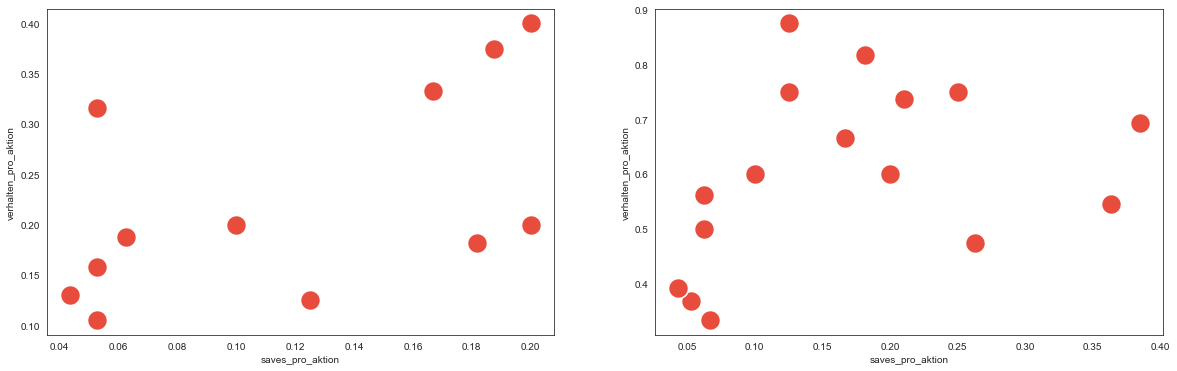

In [20]:
gk_ndz = df[['spielcode', 'team', 'spielsituation', 'verhalten', 'outcome', 'ist_tor']]
gk_ndz = gk_ndz[gk_ndz.spielsituation == 'nahdistanzzone']
gk_ndz['outcome'] = gk_ndz.outcome.apply(lambda x: 1 if x == 'kein_tor_gehalten' else 0 if x == 'tor_erhalten' else np.nan)
gk_aktionen = gk_ndz.groupby('team').agg({'spielcode': 'count'}).rename(columns={'spielcode': 'aktionen_ndz'}).reset_index()
gk_verhalten = gk_ndz.groupby(['team', 'verhalten']).agg({'verhalten': 'count', 'outcome': 'sum'}).rename(columns={'verhalten': 'total_verhalten', 'outcome': 'total_saves'}).reset_index()
group_ndz = pd.merge(gk_verhalten, gk_aktionen)

group_ndz['verhalten_pro_aktion'] = group_ndz.total_verhalten / group_ndz.aktionen_ndz
group_ndz['saves_pro_aktion'] = group_ndz.total_saves / group_ndz.aktionen_ndz
group_ndz.drop(columns=['total_verhalten', 'total_saves', 'aktionen_ndz'], inplace=True)
group_ndz = group_ndz.loc[group_ndz.saves_pro_aktion != 0]

ndz_go = group_ndz[group_ndz.verhalten == 'go'].reset_index()
ndz_stay = group_ndz[group_ndz.verhalten == 'stay'].reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

scatter_go = sns.scatterplot(x='saves_pro_aktion', y='verhalten_pro_aktion', s=400, data=ndz_go, ax=ax[0])
scatter_stay = sns.scatterplot(x='saves_pro_aktion', y='verhalten_pro_aktion', s=400, data=ndz_stay, ax=ax[1])

plt.show()

In [198]:
gk_hoherball = df[['spielcode', 'goalkeeper', 'spielsituation', 'verhalten', 'outcome', 'ist_tor', 'korrektes_verhalten']]
gk_hoherball = gk_hoherball[gk_hoherball.spielsituation == 'hoher_ball']
gk_hoherball['outcome'] = gk_hoherball.outcome.apply(lambda x: x if x == 'kein_tor_gehalten' else x if x == 'tor_erhalten' else np.nan)
gk_hoherball.dropna(subset=['outcome'], inplace=True)
gk_aktionen = gk_hoherball.groupby('goalkeeper').agg({'spielcode': 'count'}).rename(columns={'spielcode': 'aktionen_hoherball'}).reset_index()
gk_verhalten = gk_hoherball.groupby(['goalkeeper', 'verhalten']).agg({'verhalten': 'count', 'outcome': 'sum'}).rename(columns={'verhalten': 'total_verhalten', 'outcome': 'total_saves'}).reset_index()
group_hoherball = pd.merge(gk_verhalten, gk_aktionen)

group_hoherball['verhalten_pro_aktion'] = group_hoherball.total_verhalten / group_hoherball.aktionen_hoherball
group_hoherball['save_pro_aktion'] = group_hoherball.total_saves / group_hoherball.aktionen_hoherball
group_hoherball.drop(columns=['total_verhalten', 'total_saves', 'aktionen_hoherball'], inplace=True)

hb_catch = group_hoherball[group_hoherball.verhalten == 'catch'].reset_index()
hb_stay = group_hoherball[group_hoherball.verhalten == 'stay'].reset_index()
hb_back = group_hoherball[group_hoherball.verhalten == 'back'].reset_index()

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

scatter_catch = sns.scatterplot(x='save_pro_aktion', y='verhalten_pro_aktion', s=400, data=hb_catch, ax=ax[0])
scatter_stay = sns.scatterplot(x='save_pro_aktion', y='verhalten_pro_aktion', s=400, data=hb_stay, ax=ax[1])
scatter_back = sns.scatterplot(x='save_pro_aktion', y='verhalten_pro_aktion', s=400, data=hb_back, ax=ax[2])

plt.show()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

TypeError: text() missing 1 required positional argument: 's'

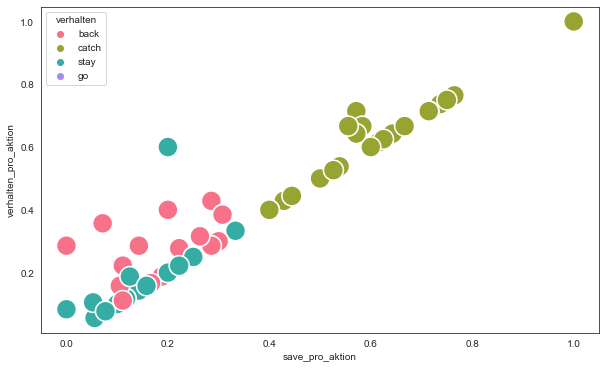

In [23]:
fig = plt.figure(figsize=(10,6))

sns.scatterplot(x='save_pro_aktion', y='verhalten_pro_aktion', s=400, data=group_hoherball, hue='verhalten')

for i in range(group_hoherball.shape[0]):
    plt.text(x=group_hoherball.save_pro_aktion[i], 
        y=group_hoherball.verhalten_pro_aktion[i],
        fontsize=20,
        bbox=dict(facecolor='gray', alpha=0.1))

plt.show()

In [24]:
print(df[(df.team == 'Frankreich') & (df.outcome == 'tor_erhalten')])
print(df[(df.spielsituation == 'hoher_ball') & ((df.outcome == 'tor_erhalten')| (df.outcome == 'kein_tor_gehalten'))].count())

     spielcode             th_name        team   paarung minuten topszene  \
952         VR  F R A  Hugo Lloris  Frankreich    Ungarn   46'09      NaN   
1477        VR  F R A  Hugo Lloris  Frankreich  Portugal   30'00      NaN   
1483        VR  F R A  Hugo Lloris  Frankreich  Portugal   59'30      NaN   
1857       1/8  F R A  Hugo Lloris  Frankreich   Schweiz   14'48      NaN   
1872       1/8  F R A  Hugo Lloris  Frankreich   Schweiz   84'11        T   
1876       1/8  F R A  Hugo Lloris  Frankreich   Schweiz   89'45      NaN   

     ist_standard korrektes_verhalten korrekte_technik goalkeeper  \
952          nein                  ja             nein     Lloris   
1477           ja                 NaN              NaN     Lloris   
1483           ja                 NaN              NaN     Lloris   
1857         nein                  ja             nein     Lloris   
1872         nein                  ja               ja     Lloris   
1876         nein                  ja         

In [25]:
technik_rz = df[['spielcode', 'team', 'spielsituation', 'technik', 'outcome', 'ist_tor']]
technik_rz = technik_rz[(technik_rz.spielsituation == 'rote_zone') & (technik_rz.outcome.isin(['kein_tor_gehalten', 'tor_erhalten']))]

group_technik_rz = technik_rz.groupby(['technik', 'outcome']).spielcode.count().reset_index()
pivot_technik_rz = group_technik_rz.pivot(index='technik', columns='outcome', values='spielcode')
pivot_technik_rz['abgewehrt'] = pivot_technik_rz.kein_tor_gehalten / (pivot_technik_rz.kein_tor_gehalten + pivot_technik_rz.tor_erhalten)
##pivot_technik_rz['abgewehrt'] = pivot_technik_rz['abgewehrt'].apply(lambda x: 1 if x.isna() else x)


In [26]:
print(pivot_technik_rz[pivot_technik_rz.abgewehrt.isna()])

outcome            kein_tor_gehalten  tor_erhalten  abgewehrt
technik                                                      
ballangriff                      1.0           NaN        NaN
ballfangen                      35.0           NaN        NaN
block                            1.0           NaN        NaN
hecht_laufend                    1.0           NaN        NaN
kleine_kreuz                     1.0           NaN        NaN
lenken_ohne_hecht                3.0           NaN        NaN
should_stay                      NaN           2.0        NaN


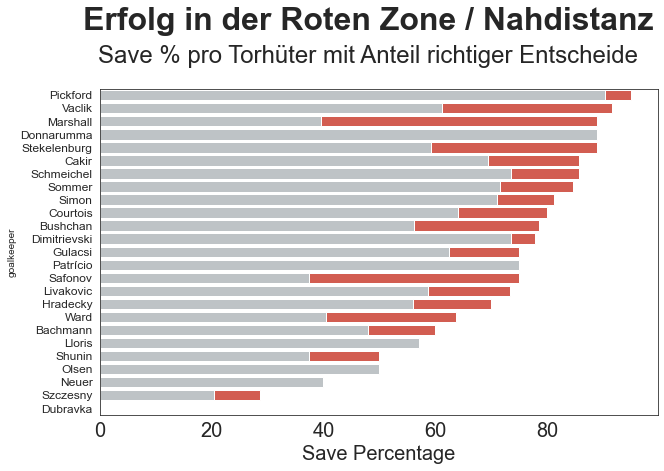

outcome                goalkeeper kein_tor_gehalten      tor_erhalten       \
korrektes_verhalten                              ja nein           ja nein   
0                        Bachmann               5.0  1.0          3.0  1.0   
1                        Bushchan               7.0  4.0          3.0  0.0   
2                           Cakir              16.0  2.0          1.0  2.0   
3                        Courtois               7.0  1.0          1.0  1.0   
4                    Dimitrievski              13.0  1.0          4.0  0.0   
5                      Donnarumma               8.0  0.0          1.0  0.0   
7                         Gulacsi               8.0  1.0          2.0  1.0   
8                        Hradecky               7.0  0.0          1.0  2.0   
9                       Livakovic               9.0  2.0          3.0  1.0   
10                         Lloris               4.0  0.0          3.0  0.0   
11                       Marshall               4.0  4.0          0.0  1.0   
12                          Neuer               2.0  0.0          3.0  0.0   
13                          Olsen               2.0  0.0          2.0  0.0   
14                       Patrício               6.0  0.0          2.0  0.0   
15                       Pickford              18.0  1.0          1.0  0.0   
16                        Safonov               2.0  1.0          0.0  1.0   
17                     Schmeichel              10.0  2.0          2.0  0.0   
18                         Shunin               2.0  0.0          1.0  1.0   
19                          Simon              12.0  1.0          2.0  1.0   
20                         Sommer               9.0  2.0          2.0  0.0   
21                   Stekelenburg               6.0  2.0          0.0  1.0   
22                       Szczesny               2.0  0.0          3.0  2.0   
23                         Vaclik               7.0  4.0          1.0  0.0   
24                           Ward               5.0  2.0          2.0  2.0   

outcome              save_perc korr_verhalten_perc  
korrektes_verhalten                                 
0                    60.000000           48.000000  
1                    78.571429           56.122449  
2                    85.714286           69.387755  
3                    80.000000           64.000000  
4                    77.777778           73.456790  
5                    88.888889           88.888889  
7                    75.000000           62.500000  
8                    70.000000           56.000000  
9                    73.333333           58.666667  
10                   57.142857           57.142857  
11                   88.888889           39.506173  
12                   40.000000           40.000000  
13                   50.000000           50.000000  
14                   75.000000           75.000000  
15                   95.000000           90.250000  
16                   75.000000           37.500000  
17                   85.714286           73.469388  
18                   50.000000           37.500000  
19                   81.250000           71.093750  
20                   84.615385           71.597633  
21                   88.888889           59.259259  
22                   28.571429           20.408163  
23                   91.666667           61.111111  
24                   63.636364           40.495868

In [206]:
#group_saves = saves.groupby(['goalkeeper', 'outcome', 'technik']).agg({'outcome': 'count'}).rename(columns={'outcome': 'anzahl_aktionen'}).reset_index()
group_saves = saves.groupby(['goalkeeper', 'outcome', 'korrektes_verhalten']).agg({'outcome': 'count'}).rename(columns={'outcome': 'anzahl_aktionen'}).reset_index()
pivot_save_verhalten = group_saves.pivot(index='goalkeeper', columns=['outcome', 'korrektes_verhalten'], values='anzahl_aktionen').reset_index()
pivot_save_verhalten = pivot_save_verhalten.fillna(0)
pivot_save_verhalten['save_perc'] = pivot_save_verhalten.iloc[:, 1:3].sum(axis=1) / pivot_save_verhalten.iloc[:, 1:5].sum(axis=1) * 100
pivot_save_verhalten['korr_verhalten_perc'] = (pivot_save_verhalten.iloc[:, [1, 3]].sum(axis=1) / pivot_save_verhalten.iloc[:, 1:5].sum(axis=1)) * pivot_save_verhalten.save_perc
#pivot_save_verhalten.drop(pivot_save_verhalten.columns[1:5], axis=1, inplace=True)
pivot_save_verhalten = pivot_save_verhalten[pivot_save_verhalten.goalkeeper != 'Dubravka']
#pivot_save_verhalten['save_perc'] = pivot_save_verhalten.kein_tor_gehalten.sum() / (pivot_save_verhalten.kein_tor_gehalten.sum() + pivot_save_verhalten.tor_erhalten.sum())

fig = plt.figure(figsize=(10,6))

s1 = sns.barplot(x='save_perc', y='goalkeeper', data=pivot_save_verhalten, orient='h', color='#E74C3C', order=pivot_saves.sort_values('save_perc', ascending=False).goalkeeper)
s2 = sns.barplot(x='korr_verhalten_perc', y='goalkeeper', data=pivot_save_verhalten, orient='h', color='#BDC3C7', order=pivot_saves.sort_values('save_perc', ascending=False).goalkeeper)

plt.xticks(fontsize=20)
plt.yticks(fontsize=12)
plt.xlabel('Save Percentage', fontsize=20)
plt.text(48, -5, 'Erfolg in der Roten Zone / Nahdistanz', ha='center', fontsize=32, fontweight='bold')
plt.text(48, -2.5, 'Save % pro Torhüter mit Anteil richtiger Entscheide', ha='center', fontsize=24)

plt.show()

#print(group_saves.groupby('technik').anzahl_aktionen.count())
#pivot_save_verhalten
#print(pivot_save_verhalten.iloc[:, [1, 3]])
#print(pivot_save_verhalten.kein_tor_gehalten.sum())

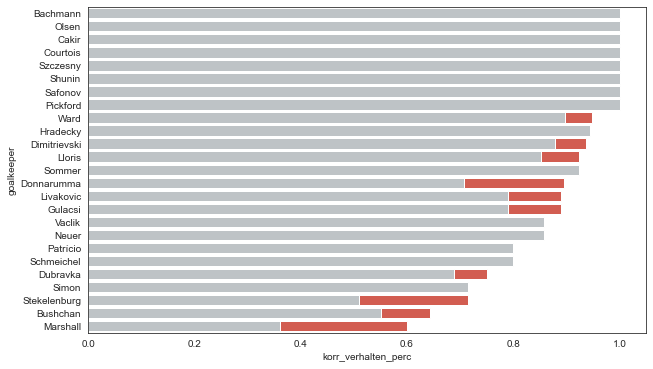

outcome                goalkeeper kein_tor_gehalten tor_erhalten       \
korrektes_verhalten                              ja           ja nein   
0                        Bachmann               4.0          0.0  0.0   
1                        Bushchan               9.0          3.0  2.0   
2                           Cakir               7.0          0.0  0.0   
3                        Courtois              14.0          0.0  0.0   
4                    Dimitrievski              14.0          1.0  0.0   
5                      Donnarumma              15.0          0.0  2.0   
6                        Dubravka               9.0          2.0  1.0   
7                         Gulacsi               7.0          1.0  0.0   
8                        Hradecky              17.0          1.0  0.0   
9                       Livakovic               7.0          1.0  0.0   
10                         Lloris              11.0          1.0  0.0   
11                       Marshall               2.0          1.0  1.0   
12                          Neuer               6.0          1.0  0.0   
13                          Olsen              12.0          0.0  0.0   
14                       Patrício               4.0          1.0  0.0   
15                       Pickford              17.0          0.0  0.0   
16                        Safonov               8.0          0.0  0.0   
17                     Schmeichel               8.0          2.0  0.0   
18                         Shunin               2.0          0.0  0.0   
19                          Simon               5.0          2.0  0.0   
20                         Sommer              12.0          1.0  0.0   
21                   Stekelenburg               4.0          1.0  1.0   
22                       Szczesny               4.0          0.0  0.0   
23                         Vaclik               6.0          1.0  0.0   
24                           Ward              17.0          1.0  0.0   

outcome             kein_tor_gehalten save_perc korr_verhalten_perc  
korrektes_verhalten              nein                                
0                                 0.0  1.000000            1.000000  
1                                 0.0  0.642857            0.551020  
2                                 0.0  1.000000            1.000000  
3                                 0.0  1.000000            1.000000  
4                                 1.0  0.937500            0.878906  
5                                 2.0  0.894737            0.706371  
6                                 0.0  0.750000            0.687500  
7                                 1.0  0.888889            0.790123  
8                                 0.0  0.944444            0.944444  
9                                 1.0  0.888889            0.790123  
10                                1.0  0.923077            0.852071  
11                                1.0  0.600000            0.360000  
12                                0.0  0.857143            0.857143  
13                                0.0  1.000000            1.000000  
14                                0.0  0.800000            0.800000  
15                                0.0  1.000000            1.000000  
16                                0.0  1.000000            1.000000  
17                                0.0  0.800000            0.800000  
18                                0.0  1.000000            1.000000  
19                                0.0  0.714286            0.714286  
20                                0.0  0.923077            0.923077  
21                                1.0  0.714286            0.510204  
22                                0.0  1.000000            1.000000  
23                                0.0  0.857143            0.857143  
24                                1.0  0.947368            0.897507

In [226]:
group_saves_hb = gk_hoherball.groupby(['goalkeeper', 'outcome', 'korrektes_verhalten']).agg({'outcome': 'count'}).rename(columns={'outcome': 'anzahl_aktionen'}).reset_index()
pivot_save_hb = group_saves_hb.pivot(index='goalkeeper', columns=['outcome', 'korrektes_verhalten'], values='anzahl_aktionen').reset_index()
pivot_save_hb = pivot_save_hb.fillna(0)
pivot_save_hb['save_perc'] = (pivot_save_hb.iloc[:, [1, 4]].sum(axis=1) / pivot_save_hb.iloc[:, 1:5].sum(axis=1)) 
pivot_save_hb['korr_verhalten_perc'] = (pivot_save_hb.iloc[:, 1:3].sum(axis=1) / pivot_save_hb.iloc[:, 1:5].sum(axis=1)) * pivot_save_hb.save_perc
#pivot_save_hb.drop(pivot_save_hb.columns[1:5], axis=1, inplace=True)

fig = plt.figure(figsize=(10,6))

s1 = sns.barplot(x='save_perc', y='goalkeeper', data=pivot_save_hb, orient='h', color='#E74C3C', order=pivot_save_hb.sort_values('save_perc', ascending=False).goalkeeper)
s2 = sns.barplot(x='korr_verhalten_perc', y='goalkeeper', data=pivot_save_hb, orient='h', color='#BDC3C7', order=pivot_save_hb.sort_values('save_perc', ascending=False).goalkeeper)

plt.show()

pivot_save_hb